In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import pyproj
import pygmt

import pooch
import boule as bl
import verde as vd
import harmonica as hm

In [10]:
import matplotlib.pyplot as plt

## Download data

In [8]:
# Download and cache the CSV version (no metadata), getting gravity data for australia
fname = pooch.retrieve(
    url="doi:10.6084/m9.figshare.13643837/australia-ground-gravity.csv",
    known_hash="md5:d47fef200d92c682dc8b63fe31b80364",
    progressbar=True,
)

In [3]:
# Load the data with pandas
data = pd.read_csv(fname)
data

,gravity,gravity_accuracy,height_error,reliability_index,survey_id,longitude,latitude,height
0,979314.81,0.2,10.06,1,195951,138.620497,-31.117129,515.11
1,979322.00,0.2,10.06,1,195951,138.612697,-31.128329,470.83
2,979303.88,0.2,10.06,1,195951,138.755195,-31.094027,541.83
3,979306.88,0.2,10.06,1,195951,138.764895,-31.088427,526.33
4,979320.62,0.2,10.06,1,195951,138.825194,-31.086327,462.98
...,...,...,...,...,...,...,...,...
1789360,978682.50,0.2,6.16,4,196111,133.229599,-24.218554,602.45
1789361,978698.88,0.2,6.16,4,196111,135.242914,-23.478536,457.36
1789362,978721.31,0.2,6.16,4,196111,132.416280,-24.560232,565.01
1789363,978956.88,0.2,6.16,4,196111,139.114555,-25.496838,103.87


In [5]:
#doi from zenodo "fatiando"
doi = "10.5281/zenodo.5167357"

In [6]:
#Download earth topgraphy grid

topography = f"doi:{doi}/earth-topography-10arcmin.nc"
topography_hash = "md5:c43b61322e03669c4313ba3d9a58028d"

path_topography = pooch.retrieve(
    topography, known_hash=topography_hash, progressbar=True
)
path_topography

'/home/jupyter-nezi.mtr@gmail.com-04849/.cache/pooch/cfd6d849435e1ca109cf31d2dae3fe32-earth-topography-10arcmin.nc'

In [18]:
#load of gravity data using xarray
topography = xr.load_dataarray(path_topography)
topography

<xarray.DataArray 'topography' (latitude: 1081, longitude: 2161)>
array([[ 2742.,  2742.,  2742., ...,  2742.,  2742.,  2742.],
       [ 2768.,  2768.,  2768., ...,  2768.,  2768.,  2768.],
       [ 2822.,  2822.,  2821., ...,  2822.,  2822.,  2822.],
       ...,
       [-4243., -4244., -4245., ..., -4242., -4243., -4243.],
       [-4156., -4157., -4157., ..., -4156., -4156., -4156.],
       [-4237., -4237., -4237., ..., -4237., -4237., -4237.]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
Attributes:
    Conventions:     CF-1.8
    title:           Topographic and bathymetric height of ETOPO1 (ice surfac...
    crs:             WGS84
    source:          Generated from a spherical harmonic model by the ICGEM C...
    license:         public domain
    references:      https://doi.org/10.7289/V5C8276M
    long_name:       topographic height above mean sea level
    standard_name:   height_above_mean_sea_level
    description:     height topography/bathymetry referenced to mean sea level
    units:           m
    actual_range:    [-10023.   6082.]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

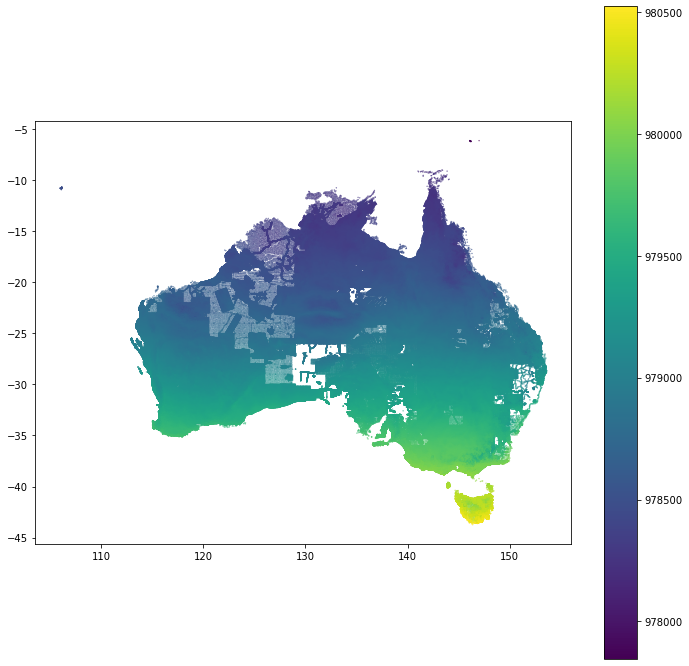

In [14]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(data.longitude, data.latitude, c=data.gravity, s=0.1)
plt.gca().set_aspect("equal")
plt.colorbar()
plt.show()

In [15]:
#alice spring region in Australia (133, 23 *based on google maps jeje)
region = (128, 136, -26, -20)

coordinates = (data.longitude, data.latitude)
inside = vd.inside(coordinates, region)

data = data[inside]
data

,gravity,gravity_accuracy,height_error,reliability_index,survey_id,longitude,latitude,height
11000,978632.00,0.01,5.06,1,196600,135.237899,-21.750203,424.24
11008,978834.62,0.60,1.06,1,199681,129.690032,-25.649330,687.99
11009,978831.62,0.60,1.06,1,199681,129.705192,-25.638730,690.41
11010,978828.19,0.60,1.06,1,199681,129.727941,-25.624080,695.85
11011,978827.00,0.60,1.06,1,199681,129.747611,-25.619539,700.10
...,...,...,...,...,...,...,...,...
1789351,978848.12,0.20,6.16,4,196111,134.827933,-25.023543,352.75
1789358,978630.62,0.20,6.16,4,196111,131.917941,-23.280232,640.69
1789360,978682.50,0.20,6.16,4,196111,133.229599,-24.218554,602.45
1789361,978698.88,0.20,6.16,4,196111,135.242914,-23.478536,457.36


In [19]:
region_pad = vd.pad_region(region, pad=5)
region_pad

(123, 141, -31, -15)

In [20]:
topography = topography.sel(
    longitude=slice(region_pad[0], region_pad[1]),
    latitude=slice(region_pad[2], region_pad[3])
)
topography

<xarray.DataArray 'topography' (latitude: 97, longitude: 109)>
array([[341., 347., 331., ...,  55.,  61.,  71.],
       [364., 369., 356., ...,  67.,  67.,  66.],
       [354., 353., 346., ...,  64.,  69.,  63.],
       ...,
       [-63., -40., -31., ..., -22., -20., -17.],
       [-72., -65., -53., ..., -29., -27., -23.],
       [-60., -71., -62., ..., -30., -27., -22.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 123.0 123.2 123.3 123.5 ... 140.7 140.8 141.0
  * latitude   (latitude) float64 -31.0 -30.83 -30.67 ... -15.33 -15.17 -15.0
Attributes:
    Conventions:     CF-1.8
    title:           Topographic and bathymetric height of ETOPO1 (ice surfac...
    crs:             WGS84
    source:          Generated from a spherical harmonic model by the ICGEM C...
    license:         public domain
    references:      https://doi.org/10.7289/V5C8276M
    long_name:       topographic height above mean sea level
    standard_name:   height_above_mean_sea_level
    description:     height topography/bathymetry referenced to mean sea level
    units:           m
    actual_range:    [-10023.   6082.]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

In [21]:
#projection Mercanto, using mean latitude
projection = pyproj.Proj(proj="merc",lat_ts=data.latitude.mean())

In [22]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

,gravity,gravity_accuracy,height_error,reliability_index,survey_id,longitude,latitude,height,easting_m,northing_m
11000,978632.00,0.01,5.06,1,196600,135.237899,-21.750203,424.24,1.383354e+07,-2.265739e+06
11008,978834.62,0.60,1.06,1,199681,129.690032,-25.649330,687.99,1.326605e+07,-2.698986e+06
11009,978831.62,0.60,1.06,1,199681,129.705192,-25.638730,690.41,1.326760e+07,-2.697790e+06
11010,978828.19,0.60,1.06,1,199681,129.727941,-25.624080,695.85,1.326992e+07,-2.696137e+06
11011,978827.00,0.60,1.06,1,199681,129.747611,-25.619539,700.10,1.327194e+07,-2.695625e+06
...,...,...,...,...,...,...,...,...,...,...
1789351,978848.12,0.20,6.16,4,196111,134.827933,-25.023543,352.75,1.379160e+07,-2.628549e+06
1789358,978630.62,0.20,6.16,4,196111,131.917941,-23.280232,640.69,1.349394e+07,-2.434198e+06
1789360,978682.50,0.20,6.16,4,196111,133.229599,-24.218554,602.45,1.362811e+07,-2.538472e+06
1789361,978698.88,0.20,6.16,4,196111,135.242914,-23.478536,457.36,1.383405e+07,-2.456172e+06


In [23]:
#projection of topoggraphy
topography_proj = vd.project_grid(topography, projection, method="nearest")
topography_proj

<xarray.DataArray 'topography' (northing: 97, easting: 109)>
array([[344. , 344. , 331. , ...,  55. ,  61. ,  71. ],
       [366.5, 366.5, 356. , ...,  67. ,  67. ,  66. ],
       [353.5, 353.5, 346. , ...,  64. ,  69. ,  63. ],
       ...,
       [-51.5, -51.5, -31. , ..., -22. , -18.5, -18.5],
       [-67. , -67. , -57.5, ..., -29.5, -27. , -22.5],
       [-67. , -67. , -57.5, ..., -29.5, -27. , -22.5]], dtype=float32)
Coordinates:
  * easting   (easting) float64 1.258e+07 1.26e+07 ... 1.441e+07 1.442e+07
  * northing  (northing) float64 -3.318e+06 -3.299e+06 ... -1.561e+06 -1.542e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

## Gravity disturbance | Disturbio de gravedad

In [28]:
#defininf elipsoide type
ellipsoid = bl.WGS84
ellipsoid

Ellipsoid(name='WGS84', semimajor_axis=6378137, flattening=0.0033528106647474805, geocentric_grav_const=398600441800000.0, angular_velocity=7.292115e-05, long_name='World Geodetic System 1984', reference='Hofmann-Wellenhof, B., & Moritz, H. (2006). Physical Geodesy (2nd, corr. ed. 2006 edition ed.). Wien\u202f; New York: Springer.')

In [30]:
normal_gravity = ellipsoid.normal_gravity(data.latitude, data.height)
normal_gravity

11000      978610.974016
11008      978788.390179
11009      978786.896759
11010      978784.186480
11011      978782.555298
               ...      
1789351    978848.160631
1789358    978641.832621
1789360    978716.063032
1789361    978711.450242
1789362    978750.812628
Length: 101047, dtype: float64

In [31]:
gravity_disturbance = data.gravity - normal_gravity

data = data.assign(gravity_disturbance_mgal=gravity_disturbance)
data

,gravity,gravity_accuracy,height_error,reliability_index,survey_id,longitude,latitude,height,easting_m,northing_m,gravity_disturbance_mgal
11000,978632.00,0.01,5.06,1,196600,135.237899,-21.750203,424.24,1.383354e+07,-2.265739e+06,21.025984
11008,978834.62,0.60,1.06,1,199681,129.690032,-25.649330,687.99,1.326605e+07,-2.698986e+06,46.229821
11009,978831.62,0.60,1.06,1,199681,129.705192,-25.638730,690.41,1.326760e+07,-2.697790e+06,44.723241
11010,978828.19,0.60,1.06,1,199681,129.727941,-25.624080,695.85,1.326992e+07,-2.696137e+06,44.003520
11011,978827.00,0.60,1.06,1,199681,129.747611,-25.619539,700.10,1.327194e+07,-2.695625e+06,44.444702
...,...,...,...,...,...,...,...,...,...,...,...
1789351,978848.12,0.20,6.16,4,196111,134.827933,-25.023543,352.75,1.379160e+07,-2.628549e+06,-0.040631
1789358,978630.62,0.20,6.16,4,196111,131.917941,-23.280232,640.69,1.349394e+07,-2.434198e+06,-11.212621
1789360,978682.50,0.20,6.16,4,196111,133.229599,-24.218554,602.45,1.362811e+07,-2.538472e+06,-33.563032
1789361,978698.88,0.20,6.16,4,196111,135.242914,-23.478536,457.36,1.383405e+07,-2.456172e+06,-12.570242


In [32]:
density = np.where(topography_proj > 0, 2670, 1040 - 2670)

topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": density})
topography_model

<xarray.Dataset>
Dimensions:   (northing: 97, easting: 109)
Coordinates:
  * easting   (easting) float64 1.258e+07 1.26e+07 ... 1.441e+07 1.442e+07
  * northing  (northing) float64 -3.318e+06 -3.299e+06 ... -1.561e+06 -1.542e+06
    top       (northing, easting) float32 344.0 344.0 331.0 ... 0.0 0.0 0.0
    bottom    (northing, easting) float64 0.0 0.0 0.0 0.0 ... -29.5 -27.0 -22.5
Data variables:
    density   (northing, easting) int64 2670 2670 2670 ... -1630 -1630 -1630
Attributes:
    coords_units:      meters
    properties_units:  SI

In [40]:
coordinates = (data.easting_m, data.northing_m, data.height)

terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")
terrain_effect

array([45.08663595, 76.61600309, 75.10878311, ..., 67.09724533,
       37.19105554, 60.67797628])

In [41]:
data = data.assign(terrain_effect_mgal=terrain_effect)
data

,gravity,gravity_accuracy,height_error,reliability_index,survey_id,longitude,latitude,height,easting_m,northing_m,gravity_disturbance_mgal,terrain_effect_mgal,gravity_bouguer_mgal
11000,978632.00,0.01,5.06,1,196600,135.237899,-21.750203,424.24,1.383354e+07,-2.265739e+06,21.025984,45.086636,-24.060652
11008,978834.62,0.60,1.06,1,199681,129.690032,-25.649330,687.99,1.326605e+07,-2.698986e+06,46.229821,76.616003,-30.386182
11009,978831.62,0.60,1.06,1,199681,129.705192,-25.638730,690.41,1.326760e+07,-2.697790e+06,44.723241,75.108783,-30.385542
11010,978828.19,0.60,1.06,1,199681,129.727941,-25.624080,695.85,1.326992e+07,-2.696137e+06,44.003520,76.309075,-32.305555
11011,978827.00,0.60,1.06,1,199681,129.747611,-25.619539,700.10,1.327194e+07,-2.695625e+06,44.444702,77.233316,-32.788615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789351,978848.12,0.20,6.16,4,196111,134.827933,-25.023543,352.75,1.379160e+07,-2.628549e+06,-0.040631,33.546646,-33.587276
1789358,978630.62,0.20,6.16,4,196111,131.917941,-23.280232,640.69,1.349394e+07,-2.434198e+06,-11.212621,66.484780,-77.697401
1789360,978682.50,0.20,6.16,4,196111,133.229599,-24.218554,602.45,1.362811e+07,-2.538472e+06,-33.563032,67.097245,-100.660277
1789361,978698.88,0.20,6.16,4,196111,135.242914,-23.478536,457.36,1.383405e+07,-2.456172e+06,-12.570242,37.191056,-49.761298


In [ ]:
data

In [42]:
gravity_bouguer = data.gravity_disturbance_mgal - data.terrain_effect_mgal

data = data.assign(gravity_bouguer_mgal=gravity_bouguer)
data

,gravity,gravity_accuracy,height_error,reliability_index,survey_id,longitude,latitude,height,easting_m,northing_m,gravity_disturbance_mgal,terrain_effect_mgal,gravity_bouguer_mgal
11000,978632.00,0.01,5.06,1,196600,135.237899,-21.750203,424.24,1.383354e+07,-2.265739e+06,21.025984,45.086636,-24.060652
11008,978834.62,0.60,1.06,1,199681,129.690032,-25.649330,687.99,1.326605e+07,-2.698986e+06,46.229821,76.616003,-30.386182
11009,978831.62,0.60,1.06,1,199681,129.705192,-25.638730,690.41,1.326760e+07,-2.697790e+06,44.723241,75.108783,-30.385542
11010,978828.19,0.60,1.06,1,199681,129.727941,-25.624080,695.85,1.326992e+07,-2.696137e+06,44.003520,76.309075,-32.305555
11011,978827.00,0.60,1.06,1,199681,129.747611,-25.619539,700.10,1.327194e+07,-2.695625e+06,44.444702,77.233316,-32.788615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789351,978848.12,0.20,6.16,4,196111,134.827933,-25.023543,352.75,1.379160e+07,-2.628549e+06,-0.040631,33.546646,-33.587276
1789358,978630.62,0.20,6.16,4,196111,131.917941,-23.280232,640.69,1.349394e+07,-2.434198e+06,-11.212621,66.484780,-77.697401
1789360,978682.50,0.20,6.16,4,196111,133.229599,-24.218554,602.45,1.362811e+07,-2.538472e+06,-33.563032,67.097245,-100.660277
1789361,978698.88,0.20,6.16,4,196111,135.242914,-23.478536,457.36,1.383405e+07,-2.456172e+06,-12.570242,37.191056,-49.761298


In [43]:
scatter_plot_gravity(
    data.easting_m,
    data.northing_m,
    data.gravity_bouguer_mgal,
    title="Bouguer gravity disturbance",
)

NameError: name 'scatter_plot_gravity' is not defined